In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# Prepare Data

In [3]:
store_data = pd.read_excel('./du lieu cung cap/ItemList.xlsx',header=None)
store_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Data columns (total 11 columns):
0     14963 non-null object
1     14963 non-null object
2     4883 non-null object
3     2185 non-null object
4     795 non-null object
5     451 non-null object
6     276 non-null object
7     196 non-null object
8     51 non-null object
9     1 non-null object
10    1 non-null object
dtypes: object(11)
memory usage: 1.3+ MB


In [5]:
store_data.tail()

,0,1,2,3,4,5,6,7,8,9,10
14958,tropical fruit,berries,other vegetables,yogurt,kitchen towels,napkins,NaN,NaN,NaN,NaN,NaN
14959,bottled water,herbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14960,fruit/vegetable juice,onions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14961,soda,root vegetables,semi-finished bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14962,bottled beer,other vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
records = []
for i in range(0, store_data.shape[0]):
    records.append([str(store_data.values[i,j]) for j in range(0, store_data.shape[1])])

In [7]:
records[0]

['sausage',
 'whole milk',
 'semi-finished bread',
 'yogurt',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

In [8]:
len(records)

14963

In [9]:
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [10]:
df.shape

(14963, 168)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Columns: 168 entries, Instant food products to zwieback
dtypes: bool(168)
memory usage: 2.4 MB


In [12]:
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
df.columns

Index(['Instant food products', 'UHT-milk', 'abrasive cleaner',
       'artif. sweetener', 'baby cosmetics', 'bags', 'baking powder',
       'bathroom cleaner', 'beef', 'berries',
       ...
       'turkey', 'vinegar', 'waffles', 'whipped/sour cream', 'whisky',
       'white bread', 'white wine', 'whole milk', 'yogurt', 'zwieback'],
      dtype='object', length=168)

In [14]:
df = df.drop(['nan'], axis=1)

In [15]:
df.isnull().any()

Instant food products    False
UHT-milk                 False
abrasive cleaner         False
artif. sweetener         False
baby cosmetics           False
                         ...  
white bread              False
white wine               False
whole milk               False
yogurt                   False
zwieback                 False
Length: 167, dtype: bool

# 1.Apply Apriori

In [16]:
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)


In [17]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric='confidence', min_threshold=0.003)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755
1,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168
2,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443
3,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060
4,(UHT-milk),(rolls/buns),0.021386,0.110005,0.001804,0.084375,0.767013,-0.000548,0.972009
...,...,...,...,...,...,...,...,...,...
1233,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
1234,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681
1235,(yogurt),"(whole milk, sausage)",0.085879,0.008955,0.001470,0.017121,1.911760,0.000701,1.008307
1236,(whole milk),"(yogurt, sausage)",0.157923,0.005748,0.001470,0.009310,1.619866,0.000563,1.003596


In [18]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beverages),(sausage),0.016574,0.060349,0.001537,0.092742,1.536764,0.000537,1.035704
1,(sausage),(beverages),0.060349,0.016574,0.001537,0.025471,1.536764,0.000537,1.009129
2,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,0.000555,1.038081
3,(citrus fruit),(specialty chocolate),0.053131,0.015973,0.001403,0.026415,1.653762,0.000555,1.010726
4,(curd),(sausage),0.033683,0.060349,0.002941,0.087302,1.446615,0.000908,1.029531
5,(sausage),(curd),0.060349,0.033683,0.002941,0.048726,1.446615,0.000908,1.015814
6,(detergent),(yogurt),0.008621,0.085879,0.001069,0.124031,1.444261,0.000329,1.043555
7,(yogurt),(detergent),0.085879,0.008621,0.001069,0.012451,1.444261,0.000329,1.003878
8,(tropical fruit),(flour),0.067767,0.009757,0.001069,0.015779,1.617141,0.000408,1.006118
9,(flour),(tropical fruit),0.009757,0.067767,0.001069,0.109589,1.617141,0.000408,1.046969


# 2.Information search

In [19]:
for row in rules.iterrows():
    if 'sausage' in row[1][0]:
        print(row)

(1, antecedents             (sausage)
consequents           (beverages)
antecedent support      0.0603489
consequent support      0.0165742
support                0.00153712
confidence              0.0254707
lift                      1.53676
leverage               0.00053689
conviction                1.00913
Name: 1, dtype: object)
(5, antecedents             (sausage)
consequents                (curd)
antecedent support      0.0603489
consequent support      0.0336831
support                0.00294059
confidence              0.0487265
lift                      1.44662
leverage              0.000907851
conviction                1.01581
Name: 5, dtype: object)
(19, antecedents                    (sausage)
consequents           (soda, whole milk)
antecedent support             0.0603489
consequent support             0.0116287
support                        0.0010693
confidence                     0.0177187
lift                             1.52371
leverage                     0.000367526

There is 'sausage' in results. It shows that sausage is usually bought with: 
* beverages
* curd
* whole milk and soda
* yogurt

In [20]:
support = rules['support'].values
confidence = rules['confidence'].values
lift = rules['lift'].values

In [21]:
import random

In [22]:
for i in range(len(support)):
    support[i] = support[i] + 0.0025*(random.randint(1,10) -5)
    confidence[i] = confidence[i] + 0.0025*(random.randint(1,10) - 5)

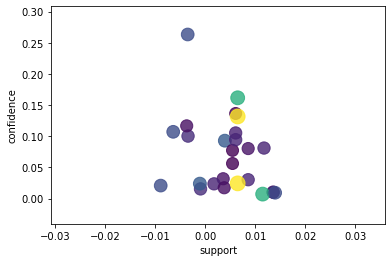

In [23]:
plt.scatter(support, confidence, s=lift*100, alpha=0.8, c=lift)
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [24]:
result = df.apply(pd.value_counts).fillna(0)
result

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
False,14903,14643,14941,14934,14960,14959,14842,14946,14455,14637,...,14883,14912,14686,14309,14955,14604,14788,12600,13678,14903
True,60,320,22,29,3,4,121,17,508,326,...,80,51,277,654,8,359,175,2363,1285,60


# 15 most purchased items

In [25]:
df_true = result.iloc[1,:]
df_true[:10]

Instant food products     60
UHT-milk                 320
abrasive cleaner          22
artif. sweetener          29
baby cosmetics             3
bags                       4
baking powder            121
bathroom cleaner          17
beef                     508
berries                  326
Name: True, dtype: int64

In [26]:
x = df_true.sort_values(ascending=False)

In [27]:
fifteen_products = x[:15]
fifteen_products

whole milk          2363
other vegetables    1827
rolls/buns          1646
soda                1453
yogurt              1285
root vegetables     1041
tropical fruit      1014
bottled water        908
sausage              903
citrus fruit         795
pastry               774
pip fruit            734
shopping bags        712
canned beer          702
bottled beer         678
Name: True, dtype: int64

In [28]:
pos = np.arange(len(fifteen_products.values))

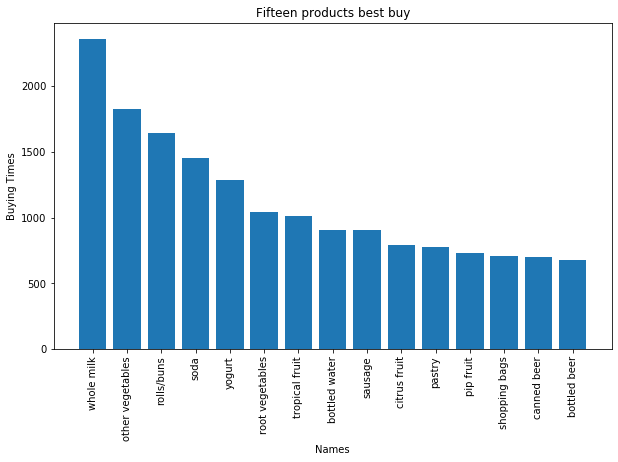

In [29]:
plt.figure(figsize=(10,6))
plt.bar(pos, fifteen_products.values, align='center')
plt.xticks(pos, fifteen_products.keys(), rotation='vertical')
plt.ylabel('Buying Times')
plt.xlabel('Names')
plt.title('Fifteen products best buy')
plt.show()

# 15 least purchased items

In [30]:
fifteen_products_least = x[-15:]
fifteen_products_least

specialty vegetables     11
organic products         10
liqueur                   9
hair spray                9
decalcifier               9
whisky                    8
salad dressing            6
make up remover           5
rubbing alcohol           5
toilet cleaner            5
frozen chicken            5
bags                      4
baby cosmetics            3
kitchen utensil           1
preservation products     1
Name: True, dtype: int64

In [31]:
pos_l = np.arange(len(fifteen_products_least.values))

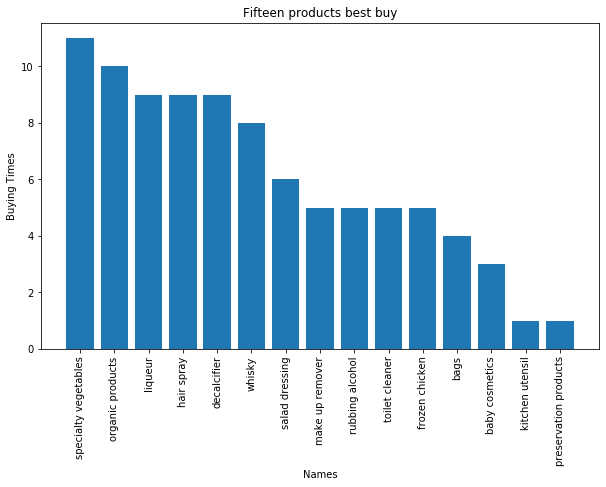

In [32]:
plt.figure(figsize=(10,6))
plt.bar(pos_l, fifteen_products_least.values, align='center')
plt.xticks(pos_l, fifteen_products_least.keys(), rotation='vertical')
plt.ylabel('Buying Times')
plt.xlabel('Names')
plt.title('Fifteen products best buy')
plt.show()